In [998]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import paramnormal
# import seaborn as sns
# from statsmodels import api
from scipy import stats
from scipy.optimize import minimize 
import json
# import pprint


In [999]:
# This function cleans the data and creates c_0, c_f, and log_c_f

def cleanData(df):
    # Remove unnecessary columns
    df = df.drop('Link', axis=1)
    df = df.dropna()
    #df = df[df['Cited by'] >= 0]
    c_0_list = []

    # Calc c_0
    c_0 = {year : df.loc[df['Year'] == year, 'Cited by'].mean() for year in range(2001,2020)}

    for index, row in df.iterrows():
        c_0_list.append(c_0[row['Year']])
        #df['c_0'][index] = c_0[row['Year']]
    df['c_0'] = c_0_list
    # Calc c_f
    df['c_f'] = df['Cited by'] / df['c_0']
    df['c_f'].astype(np.float64)
    
    df['log_c_f'] = np.log(df['c_f'])
    df = df[df['c_f'] >= 0.1]


    return df


In [1000]:
# Load data sets

ai_ml = pd.read_csv('AI_ML.csv')
col_sys = pd.read_csv('Swarming_MultiAgent.csv')
com_net = pd.read_csv('Communications_Networking.csv')
cont_alg = pd.read_csv('ControlSystems_Algorithms.csv')
cyb_sec = pd.read_csv('CyberSecurity.csv')
edg_com = pd.read_csv('EdgeComputing.csv')
ene_mgm = pd.read_csv('EnergyManagement.csv')
eth_reg = pd.read_csv('EthicsRegulations.csv')
hum_man = pd.read_csv('HumanMachineInteraction.csv')
loc_map = pd.read_csv('Localization_mapping.csv')
sen_fus = pd.read_csv('sensor_fusion.csv')
sen_tec = pd.read_csv('sensor_technology.csv')
sim_mod = pd.read_csv('Simulation_Modeling.csv')
tec_mob = pd.read_csv('Robotics.csv')


dataSets = [ai_ml, col_sys, com_net, cont_alg, cyb_sec, edg_com, ene_mgm, eth_reg, hum_man, loc_map, sen_fus, sen_tec, sim_mod, tec_mob]
keyNames = ["ai_ml", "col_sys", "com_net", "cont_alg", "cyb_sec", "edg_com", "ene_mgm", "eth_reg", "hum_man", "loc_map", "sen_fus", "sen_tec", "sim_mod", "tec_mob"]
fullNames = ["AI & Machine Learning", "Collaborative systems", "Communications & Networking", "Control systems & Algorithms", "Cybersecurity", "Edge Computing", "Energy Management", "Ethics & Regulations", "Human Machine Interaction", "Localization & Mapping", "Sensor Fusion", "Sensor Technologies", "Simulation & Modeling", "Technologies enabling mobility"]


In [1001]:
def MLE(dataSets):    
    dist = stats.lognorm
    bounds = {
        'loc': (0,1),
        's': (0,2),
        'scale': (0,2)
    }
    #bounds = [(0,2), (0,1), (0,5)]
    parameterDict = {}
    bins = 50

    for index, df in enumerate(dataSets):
        df = cleanData(df)
        vals = df['c_f'].values.tolist()
        #res = paramnormal.lognormal.fit(vals)
        res = stats.fit(dist, vals, bounds=bounds, method='mle')
        
        parameterDict.update({keyNames[index]: {'mu': res.params.loc}})
        parameterDict[keyNames[index]].update({'sigma': res.params.s})
        parameterDict[keyNames[index]].update({'scale': res.params.scale})
        
    return parameterDict

In [1002]:
# Perform the estimation
parameters = MLE(dataSets)

/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1636: RuntimeWarning: overflow encountered in divide
  x = asarray((x-loc) / scale)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/env

In [1003]:
parameters

{'ai_ml': {'mu': 0.09520260954174707,
  'sigma': 1.545241542640154,
  'scale': 0.4181820841982703},
 'col_sys': {'mu': 0.09487033002148881,
  'sigma': 1.524605548633512,
  'scale': 0.44491973501012316},
 'com_net': {'mu': 0.09735305673826317,
  'sigma': 1.7239329831100585,
  'scale': 0.33314622963374996},
 'cont_alg': {'mu': 0.09547147781256293,
  'sigma': 1.5284278519175685,
  'scale': 0.4114940895712773},
 'cyb_sec': {'mu': 0.09579330640792914,
  'sigma': 1.569649884728646,
  'scale': 0.3885951410201422},
 'edg_com': {'mu': 0.09373725977183765,
  'sigma': 1.6714002359835047,
  'scale': 0.35329014637726563},
 'ene_mgm': {'mu': 0.10059853843858513,
  'sigma': 1.4562670133904239,
  'scale': 0.44796182849304284},
 'eth_reg': {'mu': 0.09631855995151785,
  'sigma': 1.4067496411128897,
  'scale': 0.4823682175224853},
 'hum_man': {'mu': 0.1066845921425644,
  'sigma': 1.602739393283691,
  'scale': 0.41729951549174377},
 'loc_map': {'mu': 0.09303465635905997,
  'sigma': 1.5724129089433712,
  '

In [1004]:
with open("distribution_params.json", "w") as write_file:
    json.dump(parameters, write_file, indent=4)

In [1005]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times new roman"]

In [1006]:
def chi_test(df, mu, sigma, scale):
    df = cleanData(df)
    vals = df['c_f'].values.tolist()
    hist = plt.hist(vals, density=True, bins=np.linspace(0,max(vals),1001))

    dist = stats.lognorm(loc=mu, s = sigma, scale=scale)
    x = np.linspace(0,max(vals),1000)
    p = dist.pdf(x)

    observed = hist[0] / sum(hist[0])
    expected = p / sum(p)

    res = stats.chisquare(f_obs=observed, f_exp=expected)
    return res

In [1007]:
for index, df in enumerate(dataSets):
    mu = parameters[keyNames[index]]["mu"]
    sigma = parameters[keyNames[index]]["sigma"]
    scale = parameters[keyNames[index]]["scale"]

    chi_test(df, mu, sigma, scale)

/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7407: RuntimeWarning: invalid value encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7407: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs

In [1052]:
def plot_hist(dataSets, parameters=parameters, keyNames=keyNames):
    dist = stats.lognorm
    bounds = {
        'loc': (0,1),
        's': (0,2),
        'scale': (0,2)
    }

    bin_edges = np.logspace(-1,2.5,20)

    for index, df in enumerate(dataSets):
        df = cleanData(df)
        vals = df['c_f'].values.tolist()
        
        fig, axes = plt.subplots(nrows=7, ncols=2)
        axes[index][] = plt.hist(vals, bins=bin_edges, density=True)
        
       # plt.figure()
        #res = stats.fit(dist, hist[0], bounds=bounds, method='mle')

        mu = parameters[keyNames[index]]['mu'] #res.params.loc
        sigma = parameters[keyNames[index]]['sigma'] 
        scale = parameters[keyNames[index]]['scale'] 

        dist = stats.lognorm(loc=mu, s = sigma, scale=scale)
        p = dist.pdf(bin_edges)
       
        axes[index] = plt.plot(bin_edges, p)
        plt.xscale('log')
        plt.yscale('log')
        plt.title(fullNames[index])
    plt.show()
    



In [1051]:
np.logspace(-1,2.5,20)

array([1.00000000e-01, 1.52830673e-01, 2.33572147e-01, 3.56969885e-01,
       5.45559478e-01, 8.33782223e-01, 1.27427499e+00, 1.94748304e+00,
       2.97635144e+00, 4.54877795e+00, 6.95192796e+00, 1.06246783e+01,
       1.62377674e+01, 2.48162892e+01, 3.79269019e+01, 5.79639395e+01,
       8.85866790e+01, 1.35387618e+02, 2.06913808e+02, 3.16227766e+02])

In [1053]:
plot_hist(dataSets, parameters)

/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: could not broadcast input array from shape (3,) into shape (2,)

In [1035]:
def plot_all_pdfs(dataSets, parameters=parameters, keyNames=keyNames):
    

    bin_edges = np.logspace(0,2.5,20)
    for index, df in enumerate(dataSets):
        mu = parameters[keyNames[index]]['mu'] #res.params.loc
        sigma = parameters[keyNames[index]]['sigma'] 
        scale = parameters[keyNames[index]]['scale'] 

        dist = stats.lognorm(loc=mu, s = sigma, scale=scale)
        p = dist.pdf(bin_edges)
       
        plt.plot(bin_edges, p)
        plt.xscale('log')
        plt.yscale('log')
    plt.show()

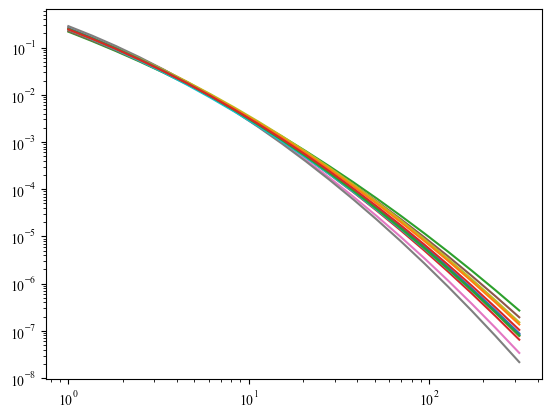

In [1042]:
plot_all_pdfs(dataSets, parameters)

In [1038]:
def test_fit(dataSets, parameters=parameters, keyNames=keyNames):
    bin_edges = np.logspace(0,3,20)
    res_dict = {}
    for index, df in enumerate(dataSets):
        df = cleanData(df)
        vals = df['c_f'].values.tolist()

        mu = parameters[keyNames[index]]["mu"]
        sigma = parameters[keyNames[index]]["sigma"]
        scale = parameters[keyNames[index]]["scale"]
        dist = stats.lognorm(loc=mu, s = sigma, scale=scale)
        hist = plt.hist(vals, bins=bin_edges, density=True)
        x = bin_edges
        p = dist.pdf(x)
        obs = np.array(hist[0])
        exp = np.array(p)
        
        res = stats.ks_2samp(obs, exp)
        print(res)

        res_dict.update({keyNames[index]: {'pvalue': res[1]}})
        res_dict[keyNames[index]].update({'statistic': res[0]})
    
    return res_dict
    
        

In [1039]:
fit_results = test_fit(dataSets)
fit_results

/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KstestResult(statistic=0.3157894736842105, pvalue=0.23542424272704296, statistic_location=0.0, statistic_sign=1)


/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KstestResult(statistic=0.2631578947368421, pvalue=0.43375177374306845, statistic_location=0.0, statistic_sign=1)
KstestResult(statistic=0.3157894736842105, pvalue=0.23542424272704296, statistic_location=0.0, statistic_sign=1)


/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KstestResult(statistic=0.2631578947368421, pvalue=0.43375177374306845, statistic_location=0.0, statistic_sign=1)


/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KstestResult(statistic=0.2631578947368421, pvalue=0.43375177374306845, statistic_location=0.0, statistic_sign=1)
KstestResult(statistic=0.3684210526315789, pvalue=0.11347310564798593, statistic_location=0.0, statistic_sign=1)
KstestResult(statistic=0.3157894736842105, pvalue=0.23542424272704296, statistic_location=0.0, statistic_sign=1)


/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KstestResult(statistic=0.3157894736842105, pvalue=0.23542424272704296, statistic_location=0.0, statistic_sign=1)


/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KstestResult(statistic=0.3157894736842105, pvalue=0.23542424272704296, statistic_location=0.0, statistic_sign=1)
KstestResult(statistic=0.21052631578947367, pvalue=0.6960843302575662, statistic_location=0.0, statistic_sign=1)


/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KstestResult(statistic=0.3157894736842105, pvalue=0.23542424272704296, statistic_location=0.0, statistic_sign=1)
KstestResult(statistic=0.3157894736842105, pvalue=0.23542424272704296, statistic_location=0.0, statistic_sign=1)
KstestResult(statistic=0.2631578947368421, pvalue=0.43375177374306845, statistic_location=0.0, statistic_sign=1)
KstestResult(statistic=0.3157894736842105, pvalue=0.23542424272704296, statistic_location=0.0, statistic_sign=1)


/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'ai_ml': {'pvalue': 0.23542424272704296, 'statistic': 0.3157894736842105},
 'col_sys': {'pvalue': 0.43375177374306845, 'statistic': 0.2631578947368421},
 'com_net': {'pvalue': 0.23542424272704296, 'statistic': 0.3157894736842105},
 'cont_alg': {'pvalue': 0.43375177374306845, 'statistic': 0.2631578947368421},
 'cyb_sec': {'pvalue': 0.43375177374306845, 'statistic': 0.2631578947368421},
 'edg_com': {'pvalue': 0.11347310564798593, 'statistic': 0.3684210526315789},
 'ene_mgm': {'pvalue': 0.23542424272704296, 'statistic': 0.3157894736842105},
 'eth_reg': {'pvalue': 0.23542424272704296, 'statistic': 0.3157894736842105},
 'hum_man': {'pvalue': 0.23542424272704296, 'statistic': 0.3157894736842105},
 'loc_map': {'pvalue': 0.6960843302575662, 'statistic': 0.21052631578947367},
 'sen_fus': {'pvalue': 0.23542424272704296, 'statistic': 0.3157894736842105},
 'sen_tec': {'pvalue': 0.23542424272704296, 'statistic': 0.3157894736842105},
 'sim_mod': {'pvalue': 0.43375177374306845, 'statistic': 0.263157

In [1040]:
c_0_list = []
c_max_list = []
for index, df in enumerate(dataSets):
    c_0_list.append(df['Cited by'].mean())
    c_max_list.append(df['Cited by'].max())

df = pd.DataFrame(parameters).T[['mu', 'sigma']]

df['c_0'] = c_0_list
df['c_max'] = c_max_list

df2 = pd.DataFrame(fit_results).T[['pvalue', 'statistic']]
df = df.join(df2)
df = df.round(2)


df.index = fullNames
print(df)
df.to_excel('output.xlsx')

                                  mu  sigma    c_0  c_max  pvalue  statistic
AI & Machine Learning           0.10   1.55  21.37   3149    0.24       0.32
Collaborative systems           0.09   1.52  20.33   2811    0.43       0.26
Communications & Networking     0.10   1.72  21.50   3149    0.24       0.32
Control systems & Algorithms    0.10   1.53  16.05   2479    0.43       0.26
Cybersecurity                   0.10   1.57  17.38   5145    0.43       0.26
Edge Computing                  0.09   1.67  37.82   7208    0.11       0.37
Energy Management               0.10   1.46  24.43   1868    0.24       0.32
Ethics & Regulations            0.10   1.41  23.14   2479    0.24       0.32
Human Machine Interaction       0.11   1.60  17.26   2093    0.24       0.32
Localization & Mapping          0.09   1.57  25.15   7208    0.70       0.21
Sensor Fusion                   0.10   1.55  21.54   2680    0.24       0.32
Sensor Technologies             0.10   1.61  17.31   1868    0.24       0.32

In [1019]:
ai_ml['Cited by'].max()

3149